<h1>IMPORTS</h1>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
file_path="C:/Users/dell/Downloads/archive (1)/StudentPerformanceFactors.csv"
df=pd.read_csv(file_path)

In [19]:
print(df.count())

Hours_Studied                 6607
Attendance                    6607
Parental_Involvement          6607
Access_to_Resources           6607
Extracurricular_Activities    6607
Sleep_Hours                   6607
Previous_Scores               6607
Motivation_Level              6607
Internet_Access               6607
Tutoring_Sessions             6607
Family_Income                 6607
Teacher_Quality               6529
School_Type                   6607
Peer_Influence                6607
Physical_Activity             6607
Learning_Disabilities         6607
Parental_Education_Level      6517
Distance_from_Home            6540
Gender                        6607
Exam_Score                    6607
dtype: int64


In [20]:
print(df.dtypes)


Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


In [18]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


Lets take a look at how many unique values are present for eeach column

In [44]:
print(df.nunique())

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64


In [21]:
print(df.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [17]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [43]:
print(df.duplicated().sum())

0


<h1>Null and Duplicate Handling</h1>
Due to the categorical nature of columns having null data, we can't replace it with average/median statistics.
Hence, In our scenario it might be better to drop such rows.Since there are no duplicate entries we may skip that step.

In [23]:
df.dropna(axis=0,inplace=True)
#inplace ensures that the original dataframe is updated
#axis=0 ensures that it's the rows having missing values that get removed and not the columns

In [28]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

As we can see all rows with missing values have been removed

<h1>EDA</h1>
<h2>Univariate Analysis</h2>

First lets do a comparison between the number of Male and Female Students

In [38]:
gender_counts=df["Gender"].value_counts()

As we can see there is a much higher number of male students as compared to female ones.Lets plot it on aagarph for better visulaisation.

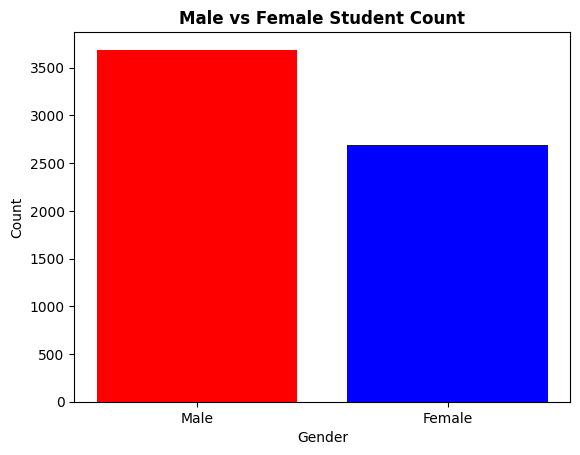

In [42]:
fig,ax=plt.subplots()
ax.bar(gender_counts.index,gender_counts.values
      ,color=["red","blue"]
      ,width=0.8)
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
ax.set_title("Male vs Female Student Count",fontweight="bold")
plt.show()


Let's take a look at how long the students study. First, let's start by making a histogram.

In [55]:
range=df["Hours_Studied"].max()-df["Hours_Studied"].min()
print(df["Hours_Studied"].max())
print(df["Hours_Studied"].min())
range

44
1


43

<Axes: xlabel='Hours_Studied', ylabel='Count'>

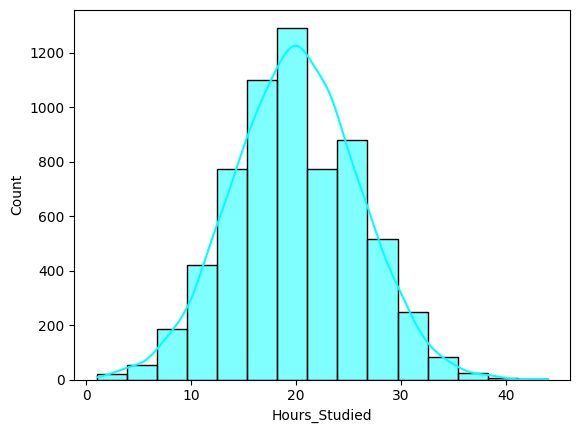

In [51]:
sns.histplot(df["Hours_Studied"],bins=15,kde=True,color="cyan")

As we can see most students study around 20 hours weekly with values ranging from 1 to 44. There is not much of a skew vissible in the data.

<Axes: ylabel='Hours_Studied'>

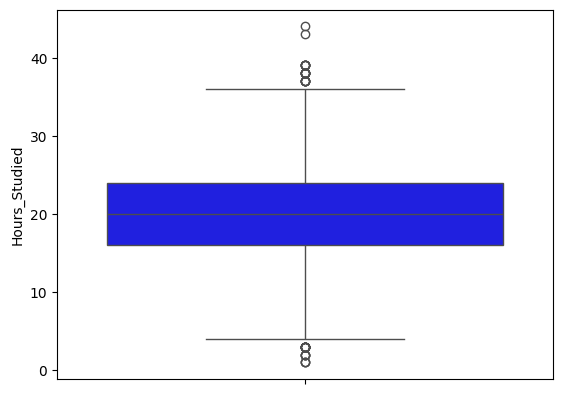

In [66]:
sns.boxplot(df["Hours_Studied"],
           color="blue")

It seems like a very symmetrical plot with almost equal widths between the median and the third as well as the first quartile. We may also observe that a few outliers exist both above the Upper Fence as well as below the Lower Fence.
Moving on to attendance. Due to its continuous nature, a histogram might be appropriate to help visualize it.

<Axes: xlabel='Attendance', ylabel='Count'>

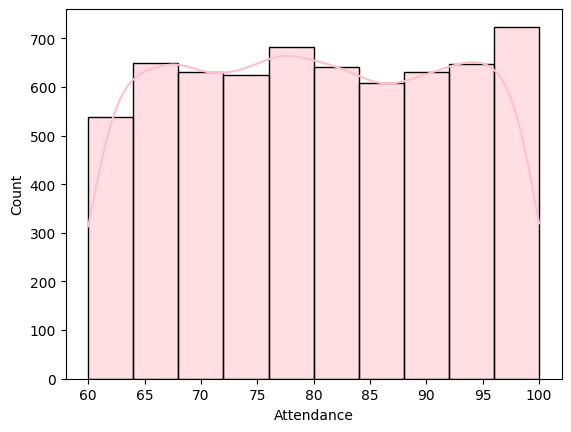

In [70]:
sns.histplot(df,x="Attendance",color="pink",kde="True",bins=10)

As we can observe, attendance has a very even distribution with many modes. We can observe that students having greater than 95% attendance form the largest group.<br>
4.Parental Involvement

In [75]:
counts=df["Parental_Involvement"].value_counts()
print(counts)

Parental_Involvement
Medium    3251
High      1836
Low       1291
Name: count, dtype: int64


As we can see Parental involvement has been divided into 3 main categories High, Medium, and Low.<br/>A pie chart should help us better visualise their disitrituion.

Text(0.5, 1.0, 'Parental Involvement in Child Education')

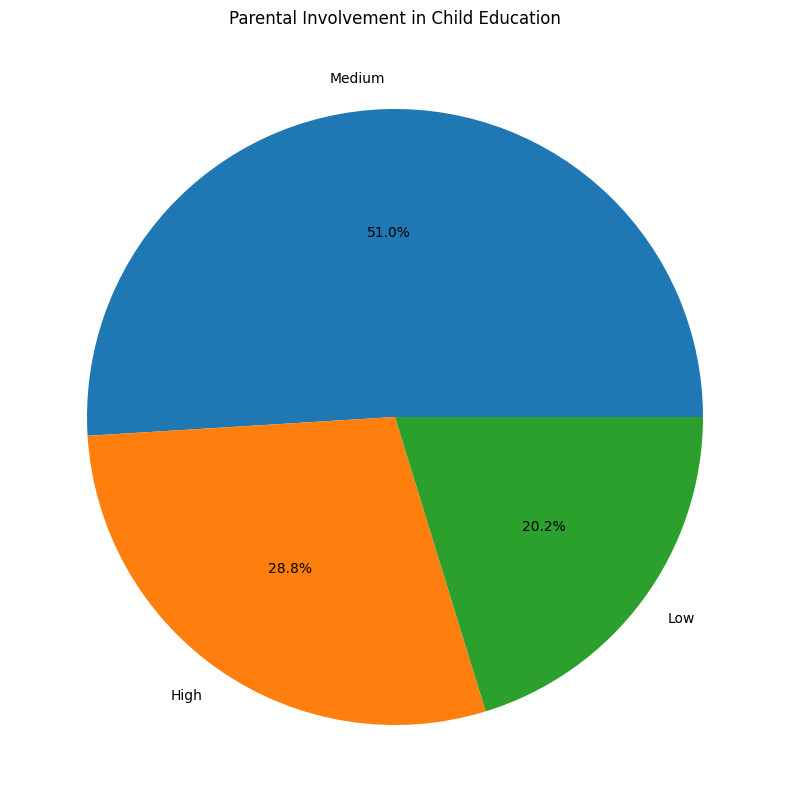

In [78]:
plt.figure(figsize=(10,10))
plt.pie(counts,
        labels=counts.index,
        autopct="%1.1f%%")
#autopct to help label slices with percentages
plt.title("Parental Involvement in Child Education")

While around 50% of Parents have a medium involvement in their child's
education, in the other half a lower percentage of parents have a higher involvement as compared to those having lower.
<br>
5.Access to resources

In [79]:
counts=df["Access_to_Resources"].value_counts()
print(counts)

Access_to_Resources
Medium    3204
High      1900
Low       1274
Name: count, dtype: int64


Similar to the previous attribute a pie chart should help in visualization of this data.

Text(0.5, 1.0, "Children's Access to Resources")

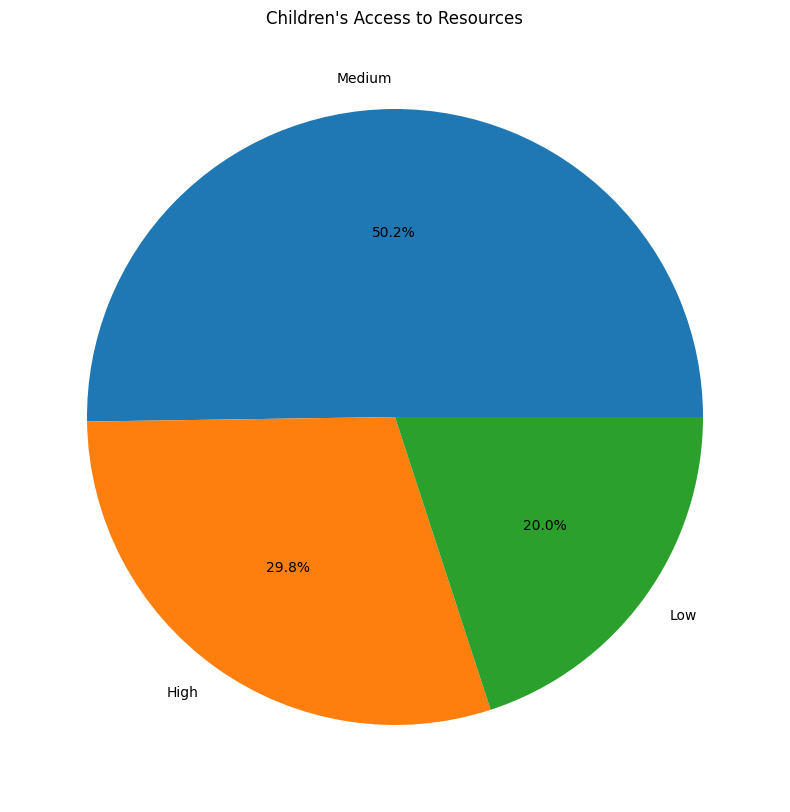

In [80]:
plt.figure(figsize=(10,10))
plt.pie(counts,
        labels=counts.index,
        autopct="%1.1f%%")
#autopct to help label slices with percentages
plt.title("Children's Access to Resources")

6.Extracurricular Activities<br/>
Let's take a look at the values of the attribute Extracurricular Activities.

In [96]:
extra_values=df["Extracurricular_Activities"].value_counts()
print(extra_values)

Extracurricular_Activities
Yes    3807
No     2571
Name: count, dtype: int64


A bar chart should be helpful in understanding and comparing the two possible values.

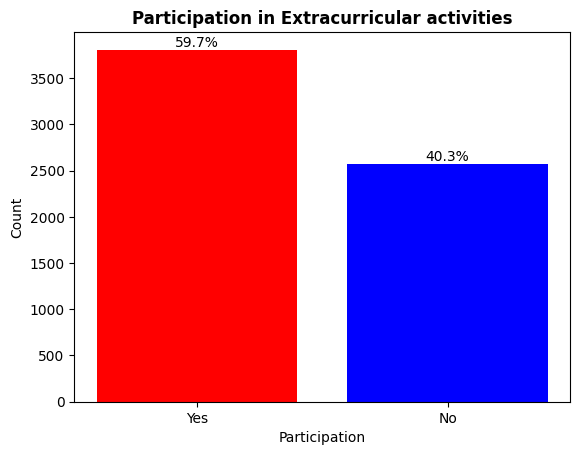

In [100]:
total=extra_values.values.sum()
percentages=[value/total*100 for value in extra_values.values]
fig,ax=plt.subplots()
bars=ax.bar(extra_values.index,extra_values.values
      ,color=["red", "blue"]
      ,width=0.8)
#zip helps make a tuple
for bar,percent in zip(bars,percentages):
    yval=bar.get_height()
    ax.annotate(f'{percent:.1f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, yval), 
                ha='center', va='bottom')
ax.set_xlabel("Participation")
ax.set_ylabel("Count")
ax.set_title("Participation in Extracurricular activities",
             fontweight="bold")
plt.show()


20 percent more people are involved in Extracurricular activies as compared to those who are not involved in the same.<br/>
7. Sleep Hours<br/>
For a numerical variable such as sleep hours a histogram-based analysis may be a good choice.

In [112]:
df["Sleep_Hours"].nunique()

7

<Axes: xlabel='Sleep_Hours', ylabel='Count'>

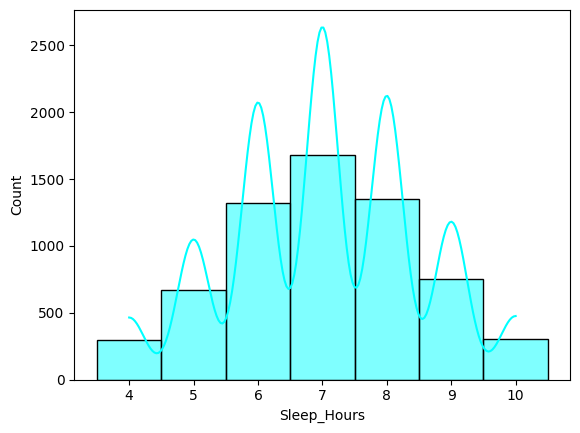

In [110]:
sns.histplot(df["Sleep_Hours"],kde=True,discrete=True,color="cyan")
#due to the relatively low no. of unique values of sleep hours we can have a discrete bar for each possible value.

In [114]:
print(df["Sleep_Hours"].mean())
print(df["Sleep_Hours"].median())

7.034963938538727
7.0


As can be observed from the graph the distribution is quite symmetrical centered at 7. The mean amount of sleep taken by a student is also around 7 hours, confirming the symmetric nature of the distribution.<br/>
8. Previous Scores
Since it's a continuous variable a histogram analysis should be appropriate.

<Axes: xlabel='Previous_Scores', ylabel='Count'>

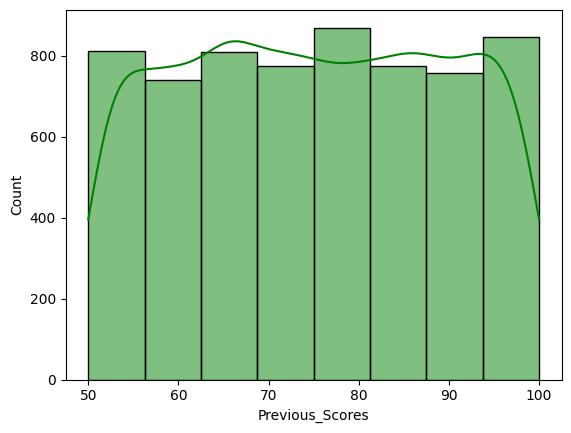

In [116]:
sns.histplot(df,x="Previous_Scores",color="green",kde="True",bins=8)

In [117]:
print(df["Previous_Scores"].mean())
print(df["Previous_Scores"].median())

75.06616494198808
75.0


<Axes: ylabel='Previous_Scores'>

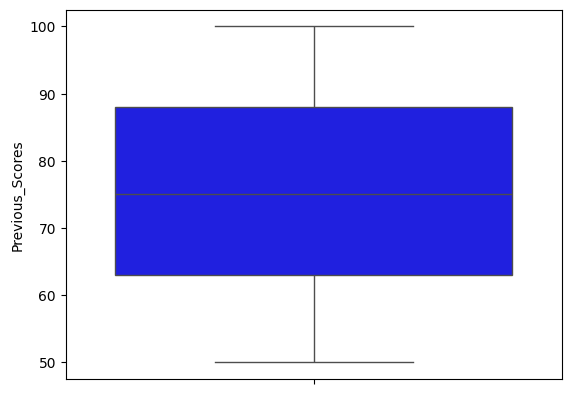

In [118]:
sns.boxplot(df["Previous_Scores"],
           color="blue")

The boxplot further demonstrates the symmetricity of the distribution of this attribute and also shows the absence of outliers.<br/>
9.Motivation Level<br/>

In [122]:
counts=df["Motivation_Level"].value_counts()
print(counts)

Motivation_Level
Medium    3237
Low       1864
High      1277
Name: count, dtype: int64


For such a categorical attribute with 3 categories only, a pie chart should be appropriate.

Text(0.5, 1.0, 'Motivation Level')

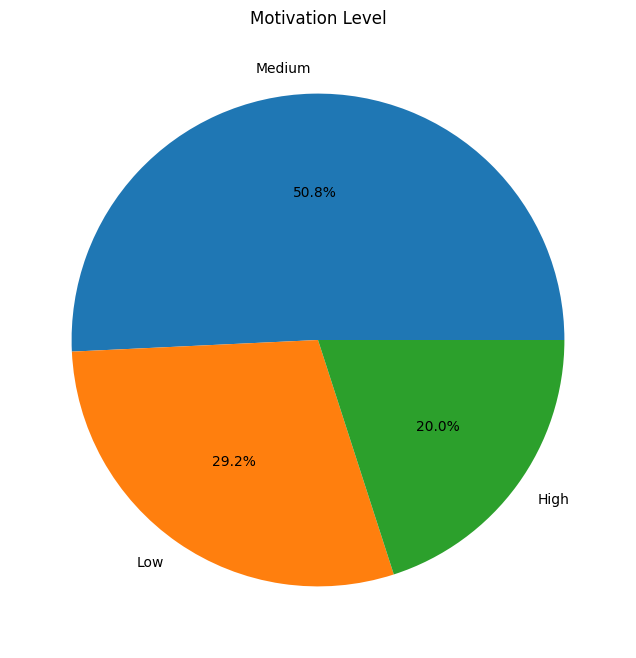

In [128]:
plt.figure(figsize=(8,8))
plt.pie(counts,
        labels=counts.index,
        autopct="%1.1f%%")
#autopct to help label slices with percentages
plt.title("Motivation Level")

Around half of the Students are moderately motivated, however, a higher fraction of students face low motivation as compared to the fraction of students who are highly motivated. This could be a cause for concern, signifying that students may require more support to help the stay motivated.

10.Internet Access

In [131]:
print(df["Internet_Access"].nunique())
access_count=df["Internet_Access"].value_counts()
print(access_count)

2
Internet_Access
Yes    5893
No      485
Name: count, dtype: int64


We can see that most students do have internet access, but a bar graph should help better analyze the differences.

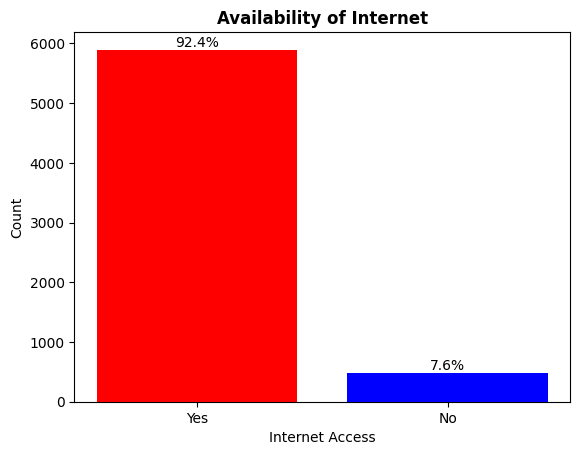

In [132]:
total=access_count.values.sum()
percentages=[value/total*100 for value in access_count.values]
fig,ax=plt.subplots()
bars=ax.bar(access_count.index,access_count.values
      ,color=["red", "blue"]
      ,width=0.8)
#zip helps make a tuple
for bar,percent in zip(bars,percentages):
    yval=bar.get_height()
    ax.annotate(f'{percent:.1f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, yval), 
                ha='center', va='bottom')
ax.set_xlabel("Internet Access")
ax.set_ylabel("Count")
ax.set_title("Availability of Internet",
             fontweight="bold")
plt.show()

Around 92% of students had access to the Internet, which is quite a large fraction.

11.Tutoring Sessions

In [135]:
print(df["Tutoring_Sessions"].nunique())
counts=df["Tutoring_Sessions"].value_counts()
print(counts)

9
Tutoring_Sessions
1    2111
2    1586
0    1458
3     800
4     296
5     101
6      18
7       7
8       1
Name: count, dtype: int64


Due to the limited no of distinct values, A histograph with discrete bars for each possible value should be appropriate.

<Axes: xlabel='Tutoring_Sessions', ylabel='Count'>

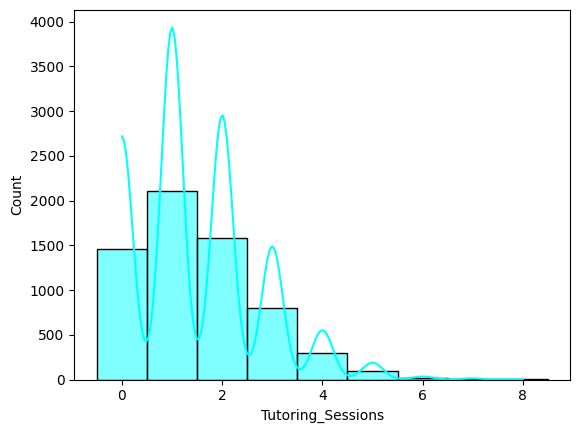

In [136]:
sns.histplot(df["Tutoring_Sessions"],kde=True,discrete=True,color="cyan")

In [137]:
print(df["Tutoring_Sessions"].mean())
print(df["Tutoring_Sessions"].median())

1.4952963311382879
1.0


As demonstrated by the graph the Histogram is right skewed, which is confirmed by the rightward shift of the mean form the Median.It can be observed from the data that few students had significant access to Tutoring and on an average only one such session could be received by the students.

12.Family Income<br/>

In [138]:
print(df["Family_Income"].nunique())
counts=df["Family_Income"].value_counts()
print(counts)

3
Family_Income
Low       2582
Medium    2566
High      1230
Name: count, dtype: int64


For such a categorical attribute with 3 categories only, a pie chart should be appropriate.

Text(0.5, 1.0, 'Family Income')

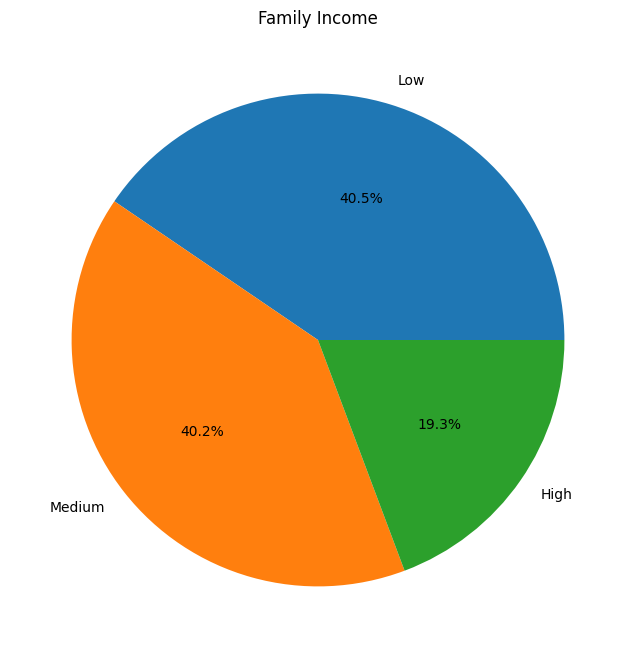

In [140]:
plt.figure(figsize=(8,8))
plt.pie(counts,
        labels=counts.index,
        autopct="%1.1f%%")
#autopct to help label slices with percentages
plt.title("Family Income")

We can observe that an almost equal amount of students hail from families having Low and Medium net income, and only roughly 1/5th of the total number of students belong to families having a High net income. This suggests that most of the students whose data has been analyzed may not have complete and easy access to educational resources which require significant investment.<br/>
13.Teacher Quality

In [141]:
print(df["Teacher_Quality"].nunique())
counts=df["Teacher_Quality"].value_counts()
print(counts)

3
Teacher_Quality
Medium    3826
High      1905
Low        647
Name: count, dtype: int64


Since Teacher Quality is a categorical attribute with only 3 possible categories, a pie chart should help us in better analysing the data.

Text(0.5, 1.0, 'Teacher Quality')

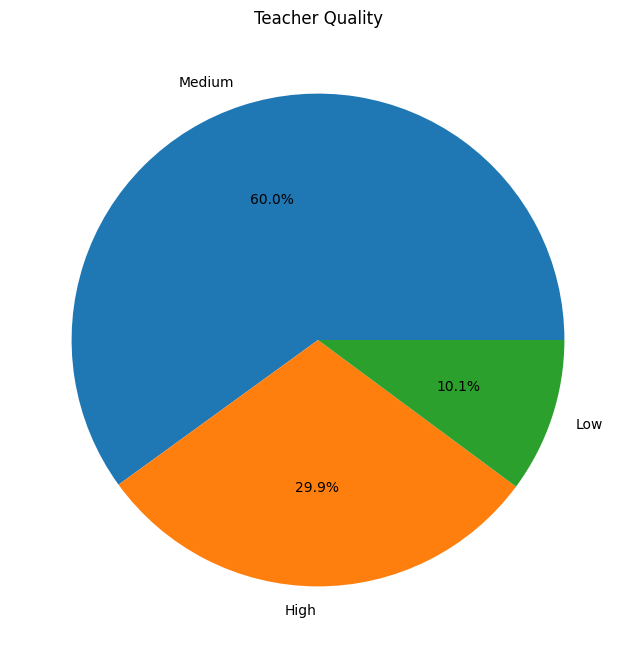

In [142]:
plt.figure(figsize=(8,8))
plt.pie(counts,
        labels=counts.index,
        autopct="%1.1f%%")
#autopct to help label slices with percentages
plt.title("Teacher Quality")

The highest fraction of students ie 60% have access to medium quality teachers, while only 10% of students study from teachers imparting a relatively lower quality of education.

14.School Type

In [145]:
print(df["School_Type"].nunique())
counts=df["School_Type"].value_counts()
print(counts)

2
School_Type
Public     4434
Private    1944
Name: count, dtype: int64


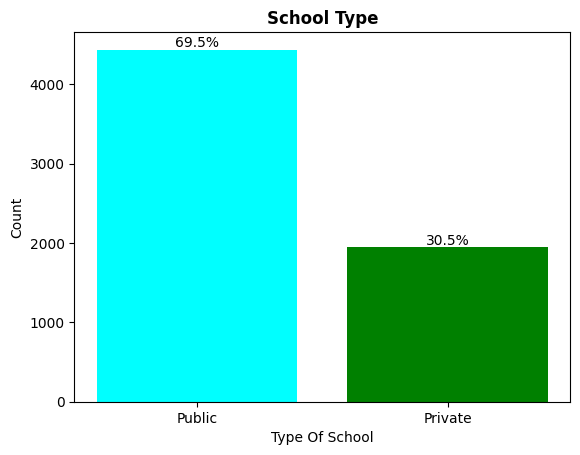

In [147]:
total=counts.values.sum()
percentages=[value/total*100 for value in counts.values]
fig,ax=plt.subplots()
bars=ax.bar(counts.index,counts.values
      ,color=["cyan", "green"]
      ,width=0.8)
#zip helps make a tuple
for bar,percent in zip(bars,percentages):
    yval=bar.get_height()
    ax.annotate(f'{percent:.1f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, yval), 
                ha='center', va='bottom')
ax.set_xlabel("Type Of School")
ax.set_ylabel("Count")
ax.set_title("School Type",
             fontweight="bold")
plt.show()

Around 70% of Students go to a Public School while only aorund 30% of students have access to resources and facilities provided by a Private School.<br/>
15.Peer Influence

In [150]:
print(df["Peer_Influence"].nunique())
counts=df["Peer_Influence"].value_counts()
print(counts)

3
Peer_Influence
Positive    2553
Neutral     2495
Negative    1330
Name: count, dtype: int64


For such a categorical attribute with 3 categories only, a pie chart should be appropriate.

Text(0.5, 1.0, 'Influence Of Peers')

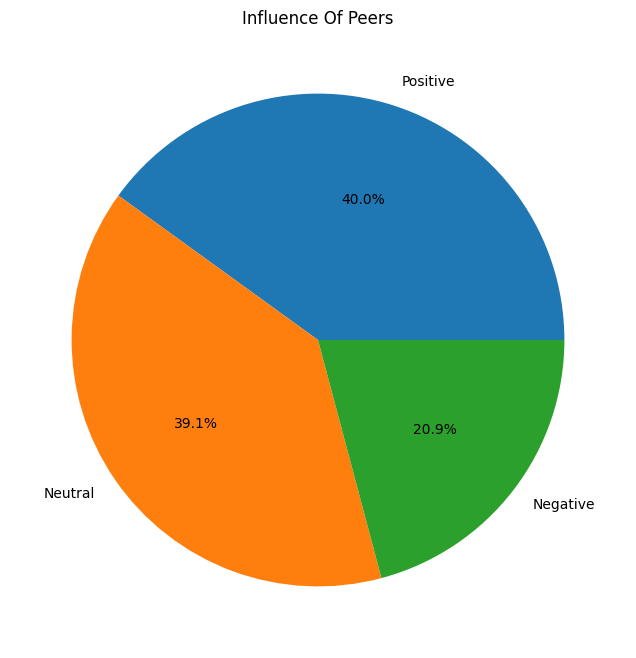

In [151]:
plt.figure(figsize=(8,8))
plt.pie(counts,
        labels=counts.index,
        autopct="%1.1f%%")
#autopct to help label slices with percentages
plt.title("Influence Of Peers")

An almost equal number of students are under Positive or Neutral influence from their peers, with only about 1/5 th of the total number of students facing a negative influence.

16.Physical Activity

In [152]:
print(df["Physical_Activity"].nunique())
counts=df["Physical_Activity"].value_counts()
print(counts)

7
Physical_Activity
3    2460
2    1562
4    1535
1     400
5     346
0      44
6      31
Name: count, dtype: int64


Due to the low number of distinct values in the distribution of number of hours spent in physical activity, a histogram plot with discrete bars for each possible value should be appropriate.

<Axes: xlabel='Physical_Activity', ylabel='Count'>

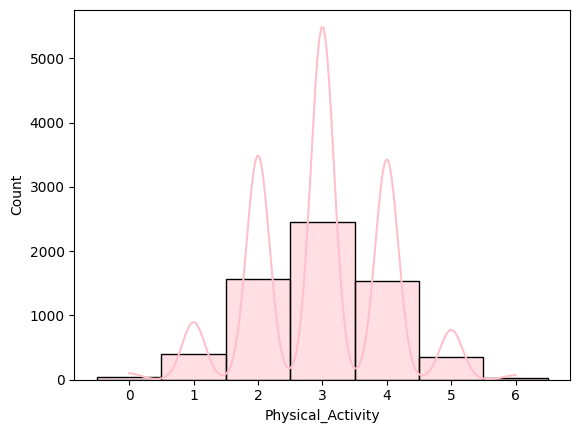

In [153]:
sns.histplot(df["Physical_Activity"],kde=True,discrete=True,color="pink")

In [155]:
print(df["Physical_Activity"].mean())
print(df["Physical_Activity"].median())


2.9727187206020695
3.0


We can observe from the graph that it is a symmetric distribution with the highest fraction of students spending around 3 hours a day in Physical Activity. An analysis confirmed by the similar mean and median both of which are around 3.

17.Learning Disabilites

In [158]:
print(df["Learning_Disabilities"].nunique())
counts=df["Learning_Disabilities"].value_counts()
print(counts)

2
Learning_Disabilities
No     5710
Yes     668
Name: count, dtype: int64


A few students suffer from Learning disabilites, the proportion may be better represented through a bar graph.

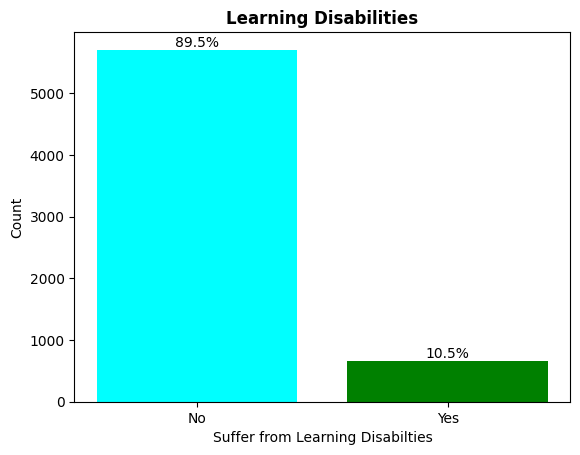

In [159]:
total=counts.values.sum()
percentages=[value/total*100 for value in counts.values]
fig,ax=plt.subplots()
bars=ax.bar(counts.index,counts.values
      ,color=["cyan", "green"]
      ,width=0.8)
#zip helps make a tuple
for bar,percent in zip(bars,percentages):
    yval=bar.get_height()
    ax.annotate(f'{percent:.1f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, yval), 
                ha='center', va='bottom')
ax.set_xlabel("Suffer from Learning Disabilties")
ax.set_ylabel("Count")
ax.set_title("Learning Disabilities",
             fontweight="bold")
plt.show()

Only about 10% of students suffer from learning disabilties.

18.Parental Education Level

In [160]:
print(df["Parental_Education_Level"].nunique())
counts=df["Parental_Education_Level"].value_counts()
print(counts)

3
Parental_Education_Level
High School     3159
College         1939
Postgraduate    1280
Name: count, dtype: int64


A pie chart should help better analyse the educational qualifications of the parents since it is a categorical attribute.

Text(0.5, 1.0, 'Parental Education')

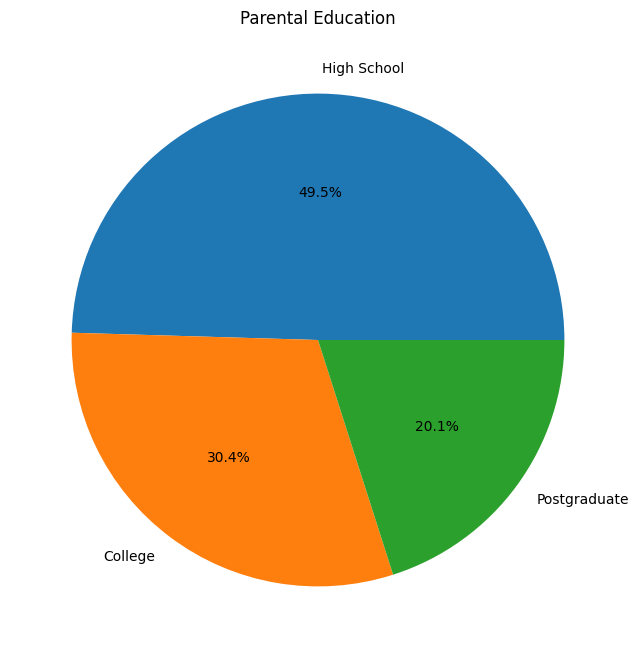

In [162]:
plt.figure(figsize=(8,8))
plt.pie(counts,
        labels=counts.index,
        autopct="%1.1f%%")
#autopct to help label slices with percentages
plt.title("Parental Education")

From the pie chart we can observe that about half of the parents only possess a high school diploma while roughly 20% of the students' parents are highly educated and posses a post graduate degree.

19.Distance from Home

In [165]:
print(df["Distance_from_Home"].nunique())
counts=df["Distance_from_Home"].value_counts()
print(counts)

3
Distance_from_Home
Near        3801
Moderate    1941
Far          636
Name: count, dtype: int64


Text(0.5, 1.0, 'Distance from Home')

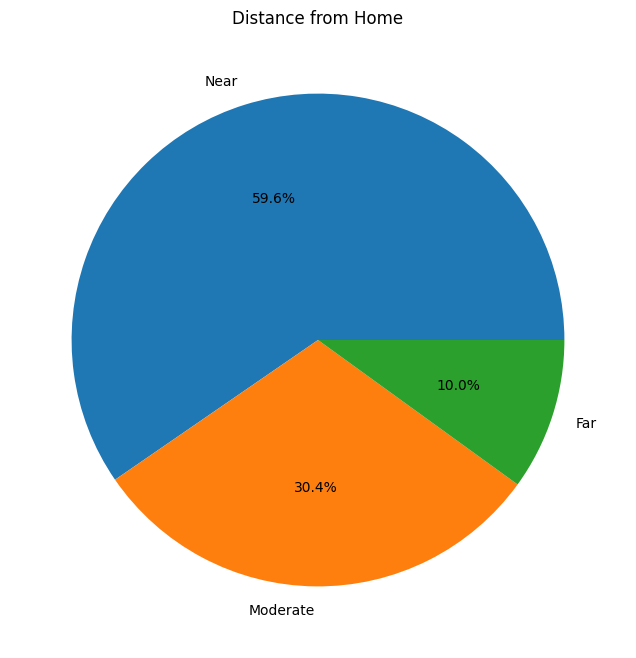

In [166]:
plt.figure(figsize=(8,8))
plt.pie(counts,
        labels=counts.index,
        autopct="%1.1f%%")
#autopct to help label slices with percentages
plt.title("Distance from Home")

About 60% of students live near the school, while 10% of students need to travel long distances to reach the school.

20.Exam Score<br/>
For such a continous attribute a histogram should be appropriate to help analyze it.

<Axes: xlabel='Exam_Score', ylabel='Count'>

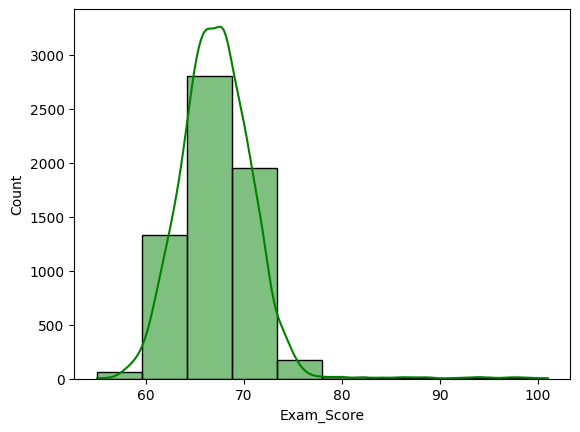

In [168]:
sns.histplot(df["Exam_Score"],kde=True,bins=10,color="green")

In [171]:
print(df["Exam_Score"].mean())
print(df["Exam_Score"].median())

67.25211665098777
67.0


The graph is slightly right skewed with most students scoring btween 60 and 70. Both of these statements are confired by the mean and mode of the data.